In [8]:
import numpy as np
import csv
import random
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import copy
import torchvision
from torchvision import transforms
import torchvision.transforms.functional as TF
import torchvision.datasets as datasets
import torch.optim as optim
from torch import utils
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
use_cuda = torch.cuda.is_available()
torch.cuda.set_device(0)
CUDA_LAUNCH_BLOCKING=1
#torch.autograd.set_detect_anomaly(True)
print (use_cuda)

torch.backends.cudnn.enabled
import os


import time
import pandas
import seaborn
import sklearn as sk

True


In [95]:
Dim = 5
J = np.zeros((Dim*Dim,Dim*Dim))
for i in range(Dim*Dim):
    for j in range(Dim*Dim):
        if ((i + 1 == j and j%Dim != 0) or (i - 1 == j and i%Dim != 0)):
            J[i,j] = 1
        if (i + Dim == j or i - Dim == j):
            J[i,j] = 1
        if ((i % Dim == 0 and j % Dim == Dim - 1) and (i + (Dim-1) == j)):
            J[i,j] = 1
        if ((j % Dim == 0 and i % Dim == Dim - 1) and (j + (Dim-1) == i)):
            J[i,j] = 1
        if ((i < Dim and j > Dim*Dim - 1 - Dim) and (i + (Dim*Dim - Dim) == j)):
            J[i,j] = 1
        if ((j < Dim and i > Dim*Dim - 1 - Dim) and (j + (Dim*Dim - Dim) == i)):
            J[i,j] = 1
J = torch.tensor(J).float()

In [96]:
def get_potential(lattices):
    ising_energy = -0.5 * np.matmul(lattices.reshape((-1,1,Dim*Dim)) , np.matmul(J,lattices.reshape((-1,Dim*Dim,1))))
    
    mag = lattices.sum(axis = 1)/25
    drop_one = -20*np.exp(-(mag-0.5)**2 / (0.25))
    drop_two = -25*np.exp(-(mag+0.5)**2 / (0.25))
    return ising_energy + drop_one+drop_two

In [ ]:
Z = {}
def split(word): 
    return [int(char) for char in word] 
temp = 2.0

num = 0
while num < 2**(Dim*Dim):
    if num % 1000000 == 0:
        print(num)
    b = bin(num)[2:].zfill(Dim*Dim)
    b = split(b)
    b = np.asarray(b)
    lattice = b*2.0 - 1.0
    lattice = lattice.reshape((1,-1))
    pot = get_potential(lattice)
    mag = lattice.sum(axis = 1)/25
    mag = tuple(mag)
    if mag in Z:
        Z[mag] += np.exp(-pot/temp)
    else:
        Z[mag] = np.exp(-pot/temp)
    num = num + 1
    

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000


In [34]:
concs = []
fe = []
for conc in Z.keys():
    c = conc[0]
    concs.append(c)
    high = (-1.0,)
    low = (1.0,)
    fe_curr = -temp*np.log(Z[conc])[0,0,0]
    fe_low = -temp*np.log(Z[low])[0,0,0]
    fe_high = -temp*np.log(Z[high])[0,0,0]
    
    c = (c + 1) / 2
    fe_act = fe_curr.item()
    fe.append(fe_act)
    

In [37]:
fe = np.asarray(fe)

[-59.199454225367795, -60.78933985176385, -62.61712940700006, -64.44355871045198, -66.10297264808716, -67.12472121323898, -67.27876043935605, -66.4122387327635, -64.68664802262812, -62.387762298704246, -59.983305577308734, -57.808838895282435, -56.33197363394658, -55.74462301974277, -56.07710138308808, -57.19921605152756, -58.7064274809489, -60.3231849178388, -61.62960409962198, -62.36466707173632, -62.36030928773419, -61.72979897598552, -60.636917935330985, -59.47207671015093, -58.32184967439559, -57.36067406853102]
[-1.0, -0.92, -0.84, -0.76, -0.68, -0.6, -0.52, -0.44, -0.36, -0.28, -0.2, -0.12, -0.04, 0.04, 0.12, 0.2, 0.28, 0.36, 0.44, 0.52, 0.6, 0.68, 0.76, 0.84, 0.92, 1.0]


In [38]:
fe_new = (fe - min(fe))/25

concs_new = (np.asarray(concs)+1.0)/2.0

print(concs_new)

[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.  ]


In [39]:
#6
#14
critical= (fe_new[20]-fe_new[6]) / (concs_new[20]-concs_new[6])
print(critical)

0.3513179394015613


In [40]:
import copy
def constr_other_line(u):
    max_val = -10000
    max_index = -1
    for i in range(concs_new.shape[0]):
        curr = concs_new[i]*u - fe_new[i]
        if curr > max_val:
            max_val = curr
            max_index = copy.deepcopy(i)
    outline = []
    for i in range(concs_new.shape[0]):
        val = fe_new[max_index] + u * (concs_new[i]-concs_new[max_index])
        outline.append(val)
    return outline

In [41]:
critical/2.0
critical

0.3513179394015613

In [49]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#003f5c
#58508d
#bc5090
#ff6361
#ffa600
N = 5
newcolors = []
newcolors.append((0,63,92))
newcolors.append((88,80,141)) 
newcolors.append((188,80,144)) 
newcolors.append((255,99,97)) 
newcolors.append((255,166,0)) 

newcolors_norm = []
for i in newcolors:
    curr = np.asarray(i)
    print(curr)
    curr = curr/255.0
    curr = tuple(curr)
    newcolors_norm.append(curr)

cmap_name = 'my_list'
newcmp = LinearSegmentedColormap.from_list(cmap_name,newcolors_norm)

[ 0 63 92]
[ 88  80 141]
[188  80 144]
[255  99  97]
[255 166   0]


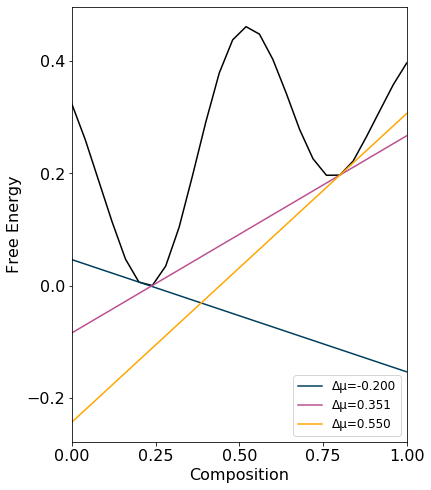

In [125]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager
mpl.rc('font',family='Arial')
hfont = {'fontname':'Arial'}
plt.rcParams["figure.figsize"] = (6,8)

plt.plot(concs_new,fe_new,color='black')
plt.plot(concs_new,constr_other_line(-0.2),color=newcmp(0.0),label = '\u0394'+'\u03BC'+'=-0.200')
plt.plot(concs_new,constr_other_line(critical),color=newcmp(0.5),label = '\u0394'+'\u03BC'+'=0.351')
plt.plot(concs_new,constr_other_line(0.55),color=newcmp(1.0),label = '\u0394'+'\u03BC'+'=0.550')
plt.xlabel('Composition',fontsize=16,fontname = "Arial")
plt.xticks([0.0,0.25,0.5,0.75,1.0])
plt.yticks([-0.2,0.0,0.2,0.4])
plt.ylabel('Free Energy',fontsize=16,fontname = "Arial")

plt.xlim(0.0,1.0)
font = font_manager.FontProperties(family='Arial',size=12)
plt.legend(loc = 4,prop=font)
plt.xticks(fontsize = 16,fontname = "Arial") 
plt.yticks(fontsize = 16,fontname = "Arial") 
plt.savefig('simple_new_final.pdf',bbox_inches = 'tight')

In [62]:

###### Based off Wu et Al. Solving Statistical Mechanics Using Variational Autoregressive Networks

def KL_loss(DBG,lattices,epoch,temp,field,num_fields):
    lattices = lattices.detach()
    probs = DBG.get_sample_prob(lattices,temp,field).view(lattices.shape[0])

    with torch.no_grad():
        energies = DBG.get_energies(lattices).view(lattices.shape[0])
        energies_norm = energies.view(-1)
        F = (energies_norm + probs*(temp.view(-1))).view(-1,1)
        
        F_new = F - (field.view(-1,1) * lattices.view(-1,DBG.Nz).sum(dim=1).view(-1,1))
        F_mean = F_new.view(-1,num_fields).view(1,-1,num_fields)
        F_mean = F_mean.mean(dim=1).view(1,1,num_fields).expand(1,int(lattices.shape[0]/num_fields),num_fields)
        
        R = (F_new.view(-1) - F_mean.reshape(-1))/torch.abs(F_mean.reshape(-1))

    assert not R.requires_grad
    assert probs.requires_grad
    return torch.mean(R*probs)

In [70]:
def initialize_model(DBG,optimizer,batch_size,temp_init,mode,is_anneal,anneal_rate,factor):
    epoch = 0
    temp = torch.zeros(batch_size).cuda()
    field = torch.zeros(batch_size).cuda()
    field_sim = torch.zeros(5).cuda()
    print_log_header()
    epochs = np.zeros((3000))
    while epoch < 3000:
        for i in range(5):
            field_sim[i] = -0.5 + 1.4*np.random.rand()
        #field_sim = np.asarray([-0.1,0.175,0.3,0.5])
        for i in range(batch_size):
            temp[i] = temp_init + (anneal_rate**epoch)*factor
        for i in range(batch_size):
            field[i] = field_sim[int(i%(len(field_sim)))]
        epoch = epoch + 1
        lattices = DBG.forward(temp,field)
        kl_loss = KL_loss(DBG,lattices,epoch,temp,field,field_sim.shape[0])

        optimizer.zero_grad()
        kl_loss.backward()
        optimizer.step()
            
        #if epoch % 5 == 0:
            #print(epoch)
       
    print("Done Training")
    return DBG

In [71]:
def print_log_header():
    print ('{:>8} {:>12}'\
       .format('epoch','train loss'))
    
def print_training_log(epoch, train_loss, test_loss=None):
    if test_loss is not None:
        print ('{:>8} {:>8} {:>12.4f} {:>12.4f}'\
                   .format(epoch, train_loss, test_loss))
        f.write('{:>8} {:>8} {:>12.4f} {:>12.4f}\n'\
                   .format(epoch, train_loss, test_loss))
    else:
        print ('{:>8} {:>8}'\
                   .format(epoch, train_loss))

In [72]:
def one_hot_to_sites(lattices,Nz):
    lattices = lattices.view(-1,Nz,2)
    lattices = torch.argmax(lattices,dim=2)
    lattices = 2*lattices - 1.0
    lattices = lattices.view(-1,Nz)
    return lattices.float()
    
def sites_to_one_hot(lattices):
    lattices = lattices.view(lattices.shape[0],-1)
    lattices = (0.5*(lattices + 1)).long()
    one_hot_lattices = torch.zeros(lattices.shape[0],lattices.shape[1],2).float().cuda()
    one_hot_lattices = one_hot_lattices.scatter_(2,lattices.view(lattices.shape[0],-1,1),1.0)
    return one_hot_lattices.detach()

In [73]:
# Zero out gradients
def get_zero_grad_hook(mask):
    def hook(grad):
        return grad * mask
    return hook


def mask_weight(m,disp):
    num_sites = m.shape[1]
    num_components = 2
    mask = torch.zeros(m.shape)
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            if (disp == 0):
                if (j == 0 or j == 1 ):
                    mask[i,j] = 1.0
                elif ((j-2) < num_components*int(i/num_components) ):
                    mask[i,j] = 1.0
            if (disp == 1):
                if (j == 0 or j==1 ):
                    mask[i,j] = 1.0
                if ((j-2) < num_components*int(i/num_components) + num_components):
                    mask[i,j] = 1.0
    mask = mask.detach()
    m_masked = m*mask
    return m_masked

In [74]:
class autoreg_model(nn.Module):
    def __init__(self,Nz,assignments):
        super().__init__()
        self.Nz = Nz
        self.Dim = int(math.sqrt(Nz))
        self.assignments = assignments
        self.activation = nn.Sigmoid()
        self.lsoftmax = torch.nn.LogSoftmax(dim=2)
        self.softmax = torch.nn.Softmax(dim=2)
        
        self.shared_layer = nn.Linear(2*self.Nz+2,2*self.Nz,bias=False)
        with torch.no_grad():
            self.shared_layer.weight.copy_(np.sqrt(2)*mask_weight(self.shared_layer.weight,0))
        self.mask_1 = mask_weight(torch.ones_like(self.shared_layer.weight),0).cuda()
        
        self.shared_layer.weight.register_hook(get_zero_grad_hook(self.mask_1))
        
        
        self.shared_layer_2 = nn.Linear(2*self.Nz+2,2*self.Nz,bias=False)
        with torch.no_grad():
            self.shared_layer_2.weight.copy_(np.sqrt(2)*mask_weight(self.shared_layer_2.weight,1))
        self.mask_2 = mask_weight(torch.ones_like(self.shared_layer_2.weight),1).cuda()
        
        self.shared_layer_2.weight.register_hook(get_zero_grad_hook(self.mask_2))
        
        
    def get_sample_prob(self,lattices,temp,field):
        #print(self.shared_layer.weight)
        
        batch_size = temp.shape[0]
        samples = sites_to_one_hot(lattices).view(batch_size,-1)
        net_in = torch.cat((field.view(-1,1)*10,samples),dim=1)
        net_in = torch.cat((temp.view(-1,1),net_in),dim=1)
        conditional = self.activation(self.shared_layer(net_in))
        conditional = torch.cat((field.view(-1,1)*10,conditional),dim=1)
        conditional = torch.cat((temp.view(-1,1),conditional),dim=1)
        conditional = self.shared_layer_2(conditional)
        conditional = conditional.view(-1,self.Nz,2)
        Probs = self.lsoftmax(conditional)
        samples = samples.detach()

        assert Probs.requires_grad == True
        site_prob = Probs*(samples.view(-1,self.Nz,2))
        probs = torch.sum(torch.sum(site_prob,dim=2),dim=1)
        return probs
        
    def forward(self,temp,field):
        
        batch_size = temp.shape[0]
        temp = temp.view(-1,1)
        field = field.view(-1,1)
        lattices = torch.zeros(batch_size,2*self.Nz).cuda()
        for site in range(self.Nz):
            net_in = torch.cat((field*10,lattices),dim=1)
            net_in = torch.cat((temp,net_in),dim=1)
            conditional = self.activation(self.shared_layer(net_in))
            conditional = torch.cat((field*10,conditional),dim=1)
            conditional = torch.cat((temp,conditional),dim=1)
            conditional = self.shared_layer_2(conditional)
            conditional = conditional.view(-1,self.Nz,2)
            Probs = self.softmax(conditional)
            To_Sample = Probs[:,site,:]
            
            sample = torch.multinomial(To_Sample,1).view(-1,1)
            #print(lattices[:,site])
            lattices = lattices.view(-1,self.Nz,2)
            lattices[:,site,:] = lattices[:,site,:].scatter_(1,sample,1)
            lattices = lattices.view(-1,2*self.Nz)
        #print(lattices.requires_grad)
        lattices = one_hot_to_sites(lattices,self.Nz)
        return lattices

def create_model(Nz,assignments,mode):
    class Discrete_Boltzmann_Generator(nn.Module):
        def __init__(self,Nz,assignments):
            super().__init__()
            self.Nz = Nz
            self.Dim = int(math.sqrt(Nz))
            self.assignment = assignments
            self.Model = autoreg_model(Nz,assignments)
            
        def forward(self,temp,field):
            return self.Model.forward(temp,field)
            
        def get_energies(self,lattices):
            energies = -0.5 * torch.matmul(lattices.view(-1,1,self.Dim*self.Dim) , torch.matmul(J,lattices.view(-1,self.Dim*self.Dim,1)))
            mag = lattices.sum(dim = 1)/25
            drop_one = -20*torch.exp(-(mag-0.5)**2 / (0.25))
            drop_two = -25*torch.exp(-(mag+0.5)**2 / (0.25))
            return energies.view(-1) + drop_one.view(-1) + drop_two.view(-1)
        
        
        def get_sample_prob(self,sample,temp,field):
            return self.Model.get_sample_prob(sample,temp,field)
        
    model = Discrete_Boltzmann_Generator(Nz,assignments).cuda()
    batch_size = assignments['batch_size']
    optimizer = optimizers[assignments['optimizer']](model.parameters(), lr=10**assignments['log_learning_rate'])
    is_anneal = assignments['is_anneal']
    anneal_rate = assignments['anneal_rate']
    factor = assignments['factor']
    model = initialize_model(model,optimizer,batch_size,2.0,mode,is_anneal,anneal_rate,factor)
    
    return model

In [75]:
activation_functions = {
    'relu': nn.ReLU(),
    'sigmoid': nn.Sigmoid(),
    'tanh': nn.Tanh(),
}

optimizers = {
    'gradient_descent': optim.SGD,
    'rmsprop': optim.RMSprop,
    'adam': optim.Adam,
}

assignments = {
    "batch_size": 500,
    "log_learning_rate": -3,
    "optimizer": "adam",
    "is_anneal": 0,
    "anneal_rate": 0.999,
    "factor": 10.0,
}

Dim = 5

In [78]:
model = create_model(25,assignments,1)

   epoch   train loss
Done Training


In [147]:
torch.save(model.state_dict(), "Legendre_Model.pth")

In [79]:
def examine_model_simple(model,chemp):
    batch_size = 250000
    temp = torch.zeros(batch_size).cuda()
    field = torch.zeros(batch_size).cuda()
    for i in range(batch_size):
        temp[i] = 2.0
    for i in range(batch_size):
        field[i] = chemp
    lattices = model.forward(temp,field)
    
    energies = model.get_energies(lattices)  
    concs = lattices.sum(dim = 1)
    probs = model.get_sample_prob(lattices,temp,field)
    fe = energies/temp + probs - field*lattices.sum(dim=1)/temp
    
    log_rw = -fe
    stored = log_rw.mean()
    log_rw_corr = log_rw - stored
    rw = torch.exp(log_rw_corr)
    rw_norm = rw/(rw.sum())
    
    concs = concs.cpu().detach().numpy()
    concs_out = ((concs/25) + 1) /2
    rw_norm = rw_norm.cpu().detach().numpy()
    #plt.hist(concs,bins = 51,range = (0.0,1.0),weights = rw_norm)
    return concs_out,rw_norm

In [97]:
def perfect_probs(chemp):
    arr = np.linspace(-25,25,51)
    temp = 2.0
    num = 0
    while num < 2**(Dim*Dim):
        if num % 1000000 == 0:
            print(num)
        b = bin(num)[2:].zfill(Dim*Dim)
        b = split(b)
        b = np.asarray(b)
        lattice = b*2.0 - 1.0
        lattice = lattice.reshape((1,-1))
        pot = get_potential(lattice)
        conc = lattice.sum(axis = 1)
        
        weight = np.exp(-pot/temp) * np.exp((chemp*conc)/temp)
        
        arr[int(conc)+25] += weight
        
        num = num + 1
    return arr

In [ ]:
arr_1 =perfect_probs(-0.2/2)
arr_2 = perfect_probs(critical/2)
arr_3 = perfect_probs(0.55/2)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000


In [101]:
data_ref_1 = arr_1/np.sum(arr_1)
data_ref_2 = arr_2/np.sum(arr_2)
data_ref_3 = arr_3/np.sum(arr_3)

NameError: name 'arr_4' is not defined

In [109]:
data_ref_1_store = []
data_ref_2_store = []
data_ref_3_store = []
for i in range(data_ref_1.shape[0]):
    if i % 2 == 0:
        data_ref_1_store.append(data_ref_1[i])
        data_ref_2_store.append(data_ref_2[i])
        data_ref_3_store.append(data_ref_3[i])
        

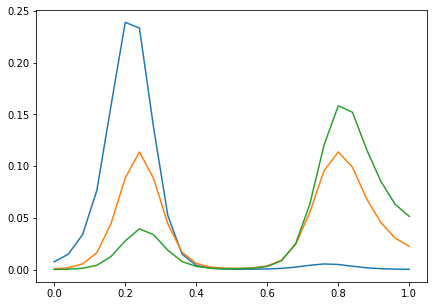

In [110]:
plt.plot(np.linspace(0,1,26),data_ref_1_store)
plt.plot(np.linspace(0,1,26),data_ref_2_store)
plt.plot(np.linspace(0,1,26),data_ref_3_store)

In [81]:
concs_one,rw_one = examine_model_simple(model,-0.2/2)
concs_two,rw_two = examine_model_simple(model,critical/2)
concs_three,rw_three = examine_model_simple(model,0.55/2)

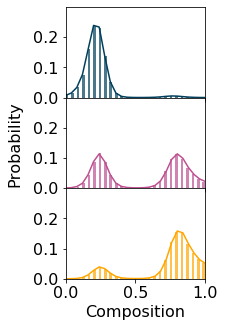

In [145]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0.0},figsize = (2.5,5))

axs[0].plot(np.linspace(0,1,26),data_ref_1_store,color=newcmp(0.0))
axs[0].set_yticks([0,0.1,0.2])
axs[0].set_ylim(0.0,0.30)
axs[0].tick_params(labelsize=16)
axs[1].plot(np.linspace(0,1,26),data_ref_2_store,color=newcmp(0.5))
axs[1].set_yticks([0,0.1,0.2])
axs[1].set_ylim(0.0,0.30)
axs[1].tick_params(labelsize=16)
axs[2].plot(np.linspace(0,1,26),data_ref_3_store,color=newcmp(1.0))
axs[2].set_yticks([0,0.1,0.2])
axs[2].set_ylim(0.0,0.30)
axs[2].tick_params(labelsize=16)
axs[0].hist(concs_one,bins = 51,range = (0.0,1.0),weights = rw_one,color=newcmp(0.0),alpha=0.7)
axs[1].hist(concs_two,bins = 51,range = (0.0,1.0),weights = rw_two,color=newcmp(0.5),alpha=0.7)
axs[2].hist(concs_three,bins = 51,range = (0.0,1.0),weights = rw_three,color=newcmp(1.0),alpha=0.7)


plt.xlabel('Composition',fontsize=16,fontname = "Arial")
#plt.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xticks([0.0,0.5,1.0])
#fig.ylabel('Prob.',fontsize=14,**hfont)
fig.text(-.2, 0.5, 'Probability', fontsize = 16,fontname = "Arial",va='center', rotation='vertical')

plt.xlim(0.0,1.0)
plt.xticks(fontsize = 16,fontname = "Arial") 
#plt.yticks(fontsize = 14,fontname = "Arial") 
plt.savefig('new_prime_june.pdf',bbox_inches='tight')